# Oxford-IIIT Pet Dataset
***
## Part 1

This part is only a demo of Oxford-IIIT Pet Dataset using Torchvision API. We may not use it in development.

Download the dataset and display the number of datapoints and classes:

In [1]:
from torchvision.datasets import OxfordIIITPet
from random import randint


data_category = OxfordIIITPet('.', download=True)
length = len(data_category)
print("Number of datapoints:", length)
classes = data_category.classes
print("Number of classes:\t   ", len(classes))

Number of datapoints: 3680
Number of classes:	    37


Select a random sample and display its label:

In [7]:
image, label = data_category[randint(0, length - 1)]
print("This is a", classes[label], '!')
image.show()

This is a Abyssinian !


The above approach is for classification task. Now let's see the dataset for segmentation task:

In [8]:
data_segmentation = OxfordIIITPet('.', target_types='segmentation', download=True)

In [9]:
image, label = data_segmentation[randint(0, length - 1)]
image.show()
label.show()

## Part 2
This part is for loading the dataset using `H5ImageLoader` class from professor. We probably will not use this class for development.

Here is how we load the dataset:

In [10]:
from loader import H5ImageLoader
from PIL.Image import fromarray


# Instantiate a loader to iterate over the dataset 1 by 1 (batch size 1)
loader = H5ImageLoader('oxford-iiit-pet/images_train.h5', 1, 'oxford-iiit-pet/labels_train.h5')

Now let's iterate over the dataset and display the first image and its label:

In [11]:
for images, labels in loader:
    print('Look the lengths of the list "images" and "labels"! They must be equal to the batch size:', len(images), ',', len(labels))
    # Finally, show the image and its label
    image = fromarray(images[0])
    image.show()
    label = fromarray(labels[0])
    label.show()
    break

Look the lengths of the list "images" and "labels"! They must be equal to the batch size: 1 , 1


[click to see professor's `.py` demo](demo.py)

## Part 3
This part shows how to do the same thing using our `SimpleOxfordPetDataset` class. This class is a wrapper for the `OxfordIIITPet` class in `segmentation_models_pytorch` library, and it gives pre-processed images and labels. Very probably we will use this class in development.

Download the dataset and display the number of datapoints and classes:

In [12]:
import matplotlib.pyplot as plt

from datasets import SimpleOxfordPetDataset
from random import randint


root = "oxford-iiit-pet"
SimpleOxfordPetDataset.download(root)
train_dataset = SimpleOxfordPetDataset(root, "train")
length = len(train_dataset)
print("Number of datapoints:", length)

Number of datapoints: 3312


Note that this dataset is made up of torch.Tensor objects!

In [13]:
image, label = train_dataset[randint(0, length - 1)]

print("image:\n\t· type:", type(image), "\n\t· shape:", image.shape)
print("label:\n\t· type:", type(label), "\n\t· shape:", label.shape)

image:
	· type: <class 'torch.Tensor'> 
	· shape: torch.Size([3, 256, 256])
label:
	· type: <class 'torch.Tensor'> 
	· shape: torch.Size([1, 256, 256])


Select a random sample and display its label:

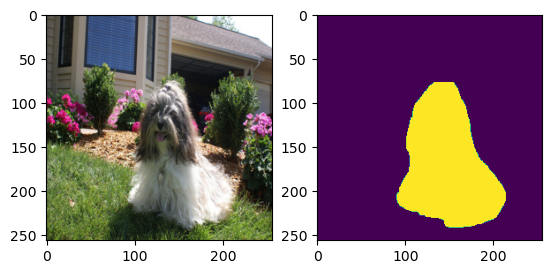

In [14]:
image, label = image.numpy(), label.numpy()

plt.subplot(1, 2, 1)
plt.imshow(image.transpose(1, 2, 0)) # for visualization we have to transpose back to HWC
plt.subplot(1, 2, 2)
plt.imshow(label.squeeze())  # for visualization we have to remove 3rd dimension of mask
plt.show()